In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from pandas import get_dummies
from sklearn import datasets
plt.style.use('fivethirtyeight')

In [2]:
iris = pd.read_csv('Iris.csv')

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


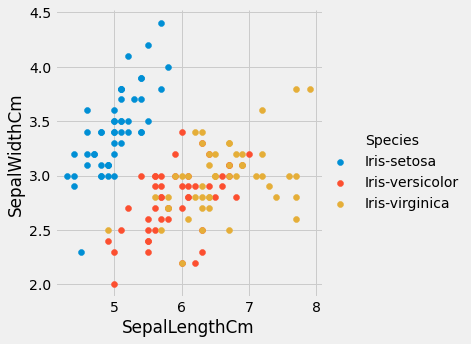

In [5]:
sns.FacetGrid(iris, hue='Species', height=5) \
    .map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm') \
    .add_legend()

plt.show()

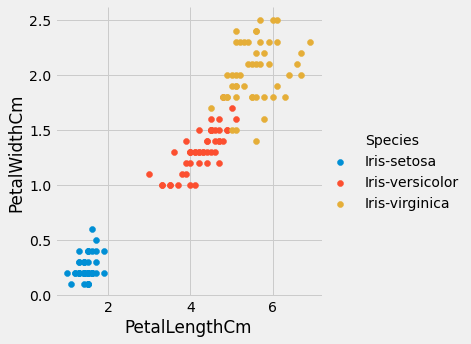

In [12]:
sns.FacetGrid(iris, hue='Species', height=5) \
    .map(plt.scatter, 'PetalLengthCm', 'PetalWidthCm') \
    .add_legend()

plt.show()

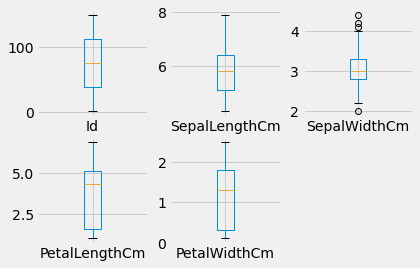

In [6]:
iris.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False)
plt.figure;

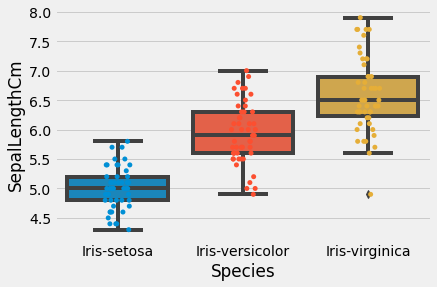

In [11]:
sns.boxplot(x='Species', y='SepalLengthCm', data=iris)
sns.stripplot(x='Species', y='SepalLengthCm', data=iris, jitter=True, edgecolor='gray')

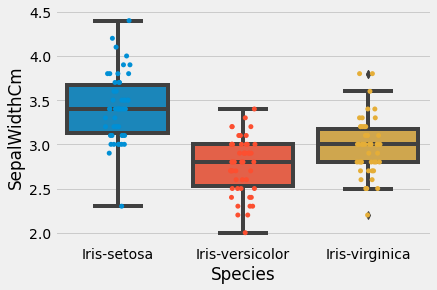

In [10]:
sns.boxplot(x='Species', y='SepalWidthCm', data=iris)
sns.stripplot(x='Species', y='SepalWidthCm', data=iris, jitter=True, edgecolor='gray')

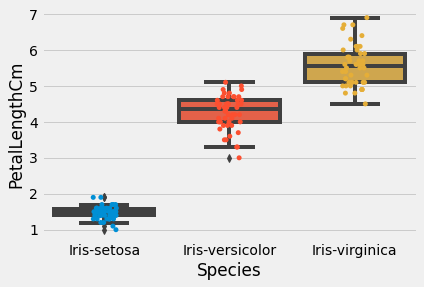

In [7]:
sns.boxplot(x='Species', y='PetalLengthCm', data=iris)
sns.stripplot(x='Species', y='PetalLengthCm', data=iris, jitter=True, edgecolor='gray')

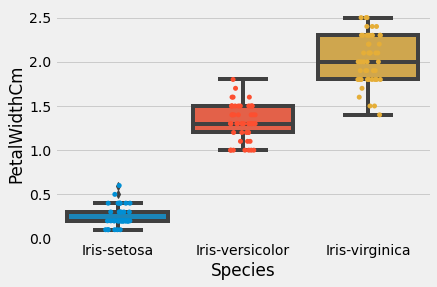

In [9]:
sns.boxplot(x='Species', y='PetalWidthCm', data=iris)
sns.stripplot(x='Species', y='PetalWidthCm', data=iris, jitter=True, edgecolor='gray')

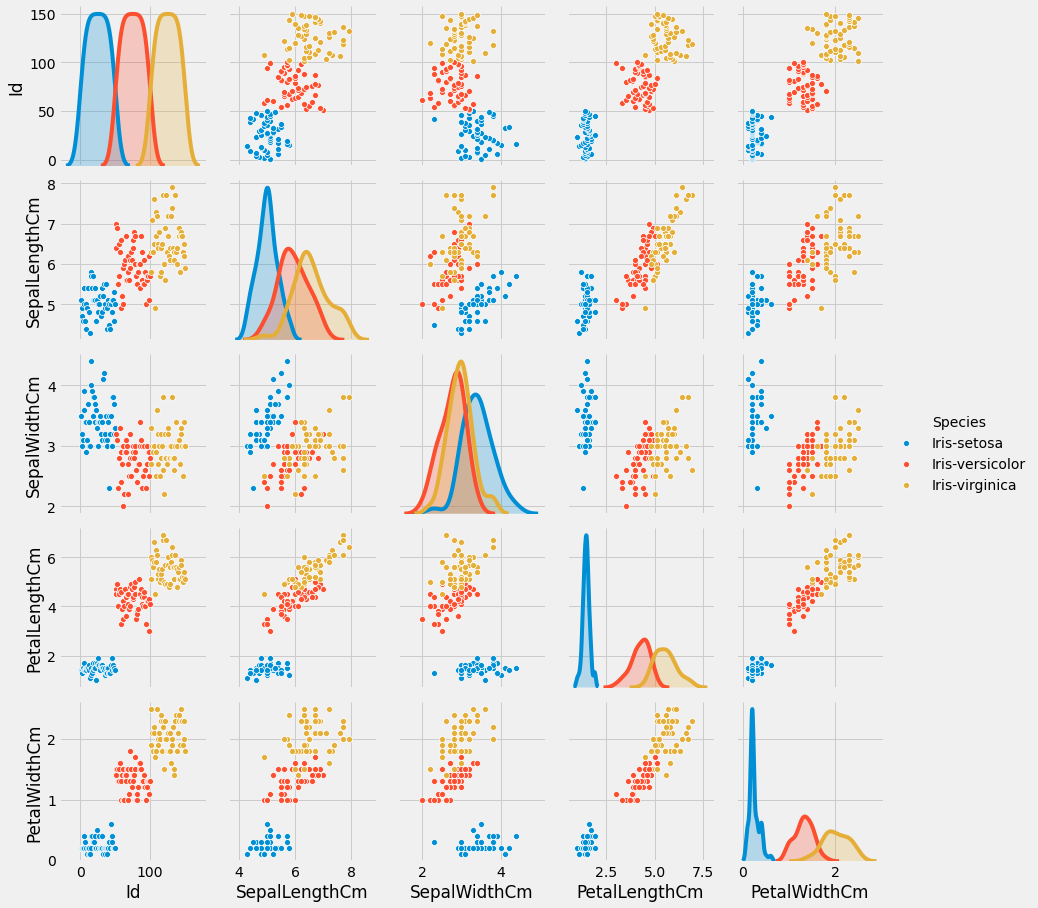

In [13]:
sns.pairplot(iris, hue='Species', diag_kind='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FD84C9F8B0>,
      dtype=object)

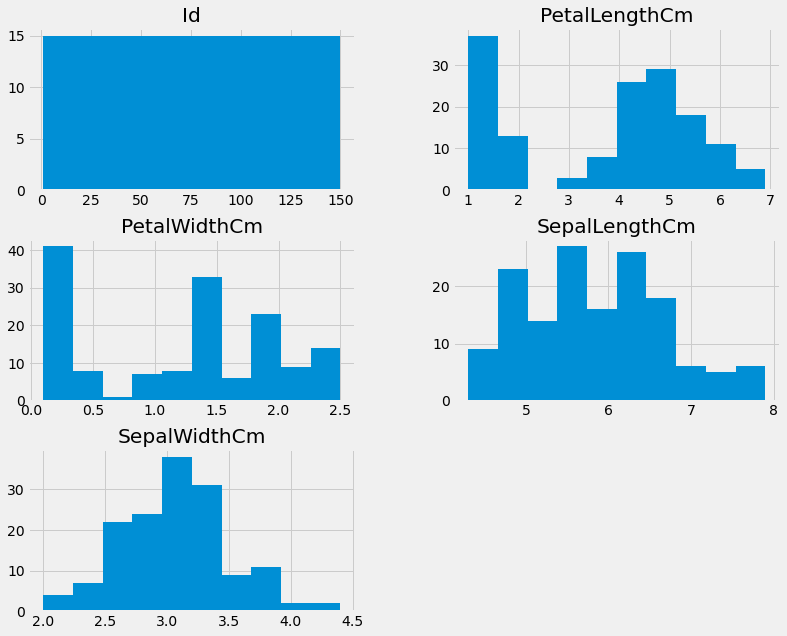

In [23]:
iris.hist(figsize=(12,10))

In [16]:
iris.shape

(150, 6)

In [15]:
iris.size

900

In [17]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [18]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [19]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [20]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [25]:
iris.groupby('Species').count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,50,50,50,50,50


In [36]:
y = iris.iloc[:,5].values
X = iris.iloc[:,1:4].values

In [39]:
y = get_dummies(y)

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [45]:
param_grid = {'n_neighbors':[1,3,5,15],
             'weights':['uniform','distance'],
             'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
             'leaf_size':[10,30,50,100]}

grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, scoring='accuracy')
grid_result = grid.fit(X_train, y_train)
best_params = grid_result.best_params_

In [46]:
best_params

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 15,
 'weights': 'distance'}

In [49]:
y_pred = grid.predict(X_test)

In [52]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      0.92      0.92        13
           2       0.89      0.89      0.89         9

   micro avg       0.95      0.95      0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38
 samples avg       0.95      0.95      0.95        38

0.9473684210526315


In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
X_sc = scaler.transform(iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])

In [83]:
Xsc_train, Xsc_test, ysc_train, ysc_test = train_test_split(X_sc, y)

In [84]:
param_grid = {'n_neighbors':[1,3,5,15],
             'weights':['uniform','distance'],
             'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
             'leaf_size':[10,30,50,100]}

grid_sc = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, scoring='accuracy')
grid_result_sc = grid_sc.fit(Xsc_train, ysc_train)
best_params_sc = grid_result_sc.best_params_

In [85]:
best_params_sc

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'uniform'}

In [86]:
ysc_pred = grid_sc.predict(Xsc_test)

In [87]:
print(classification_report(ysc_test, ysc_pred))
print(accuracy_score(ysc_test, ysc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.85      0.85      0.85        13
           2       0.80      0.80      0.80        10

   micro avg       0.89      0.89      0.89        38
   macro avg       0.88      0.88      0.88        38
weighted avg       0.89      0.89      0.89        38
 samples avg       0.89      0.89      0.89        38

0.8947368421052632


In [94]:
knc = KNeighborsClassifier(n_neighbors=8)
knc.fit(Xsc_train, ysc_train)

print(classification_report(ysc_test, knc.predict(Xsc_test)))
print(accuracy_score(ysc_test, knc.predict(Xsc_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.86      0.92      0.89        13
           2       0.89      0.80      0.84        10

   micro avg       0.92      0.92      0.92        38
   macro avg       0.92      0.91      0.91        38
weighted avg       0.92      0.92      0.92        38
 samples avg       0.92      0.92      0.92        38

0.9210526315789473
